<a href="https://colab.research.google.com/github/petroDavydov/goit-DeepLearningForComputerVisionAndNLP/blob/main/log_regres_use_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Логістична регресія засобами PyTorch***

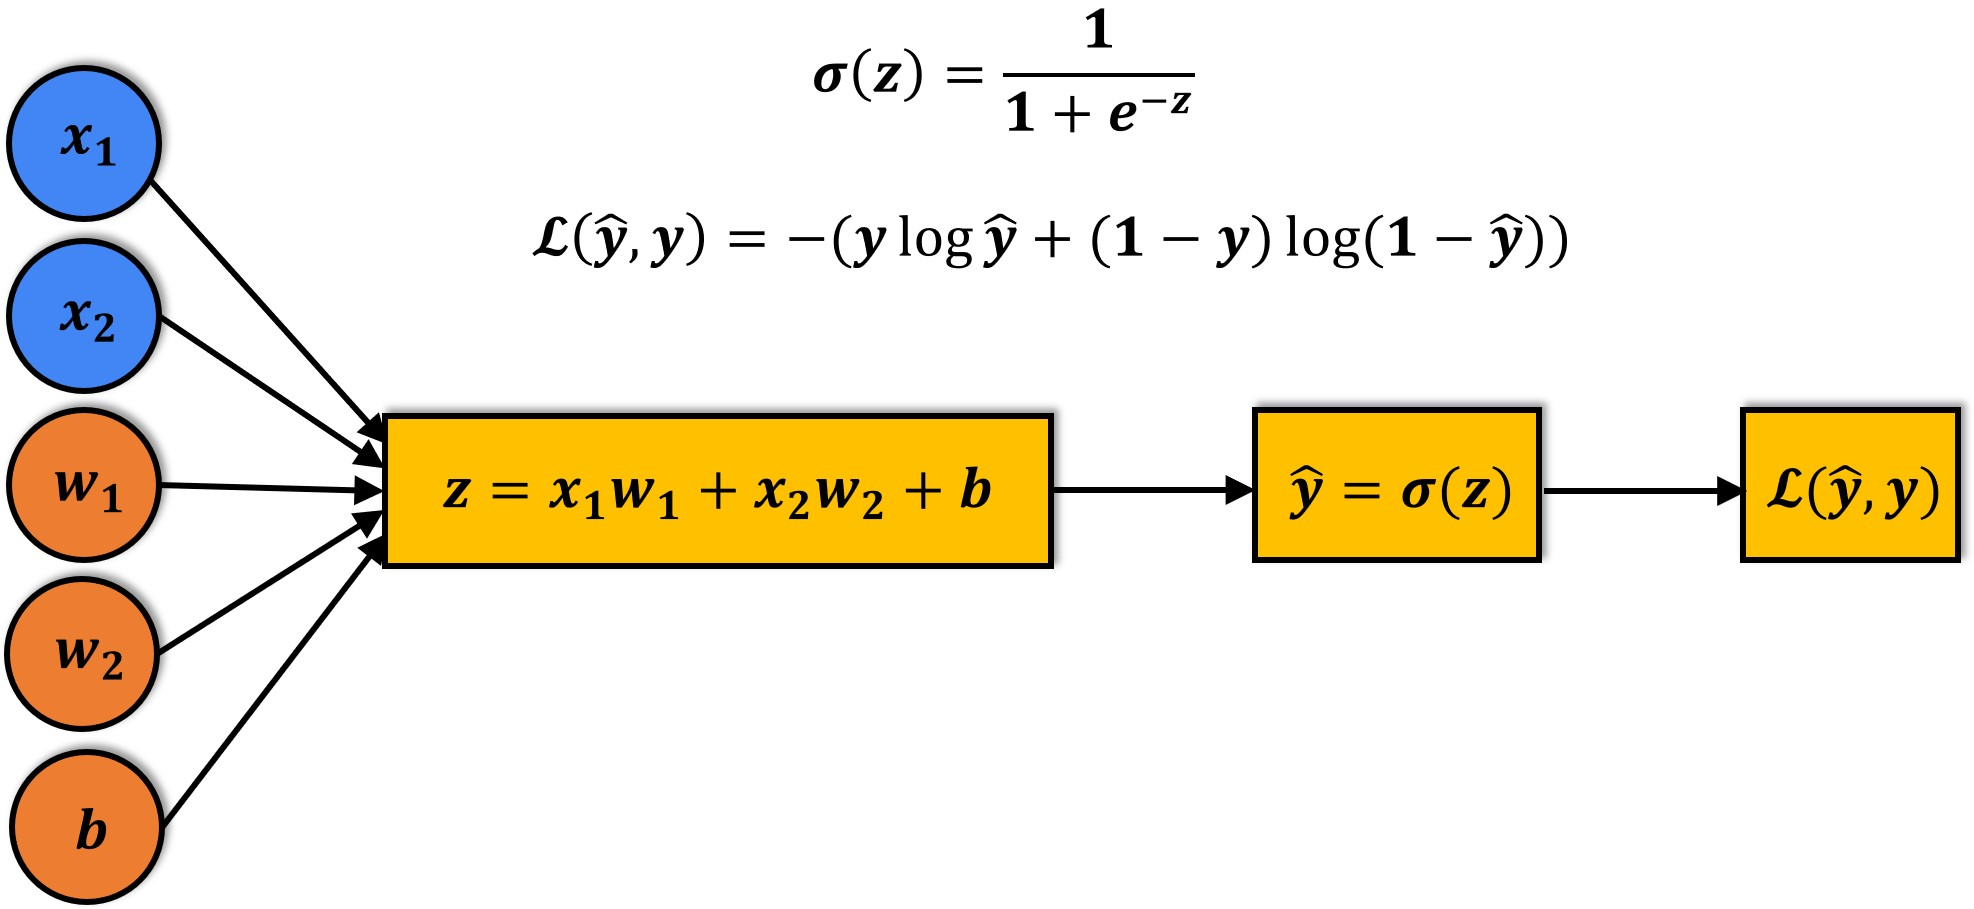

In [ ]:
import torch
import numpy as np
from torch import nn
import torch.optim as optim
from sklearn.metrics import accuracy_score


**Лінійний шар (linear layer)**

In [ ]:
m = nn.Linear(5, 3)
input = torch.randn(4, 5)
output = m(input)

print('Input:', input, f'shape {input.shape}', sep='\\n')
print('\\nOutput:', output, f'shape {output.shape}', sep='\\n')


***Функція активації***

In [ ]:
t = torch.randn(4)
print('Input: ', t)
print('Applying sigmoid: ', torch.sigmoid(t))


# **Побудова моделі**

In [ ]:
print("\n------Model PyTorch------\n")

import torch
from torch import nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Створюємо штучні дані
X, y = make_classification(n_samples=1000, n_features=18, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Перетворюємо в тензори
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# 3. Визначаємо модель
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

input_dim = X_train.shape[1]
model = LogisticRegression(input_dim)

# 4. Функція втрат і оптимізатор
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 5. Навчання моделі
num_epochs = 50
for epoch in range(num_epochs):
    outputs = model(X_train).squeeze()
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+10}/{num_epochs}], Loss: {loss.item():.4f}')

# 6. Тестування моделі
with torch.no_grad():
    y_pred = model(X_test).squeeze().numpy().round()
    acc = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {acc:.4f}")


on GPU + cuda

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import torch.optim as optim
from torch import nn
import torch

print("Для використання GPU треба переключитись у вкладці 'Change runtime type'")
print("\n------Model PyTorch with GPU------\n")


# 1. Перевірка доступності GPU
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))

# 2. Вибір пристрою (GPU або CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
print("\n------Model PyTorch with GPU------\n")

# 3. Генеруємо штучні дані
X, y = make_classification(
    n_samples=1000, n_features=18, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 4. Перетворюємо у тензори та переносимо на GPU
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

# 5. Визначаємо модель


class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out


# 6. Створюємо модель і переносимо на GPU
input_dim = X_train.shape[1]
model = LogisticRegression(input_dim).to(device)

# 7. Функція втрат і оптимізатор
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 8. Навчання моделі
num_epochs = 5000
for epoch in range(num_epochs):
    outputs = model(X_train).squeeze()
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print(
            f'Epoch [{epoch+10}/{num_epochs}], Loss: {loss.item():.4f}, Device: {outputs.device}')

# 9. Тестування моделі
with torch.no_grad():
    # переносимо назад на CPU для numpy
    y_pred = model(X_test).squeeze().cpu().numpy().round()
    acc = accuracy_score(y_test.cpu().numpy(), y_pred)
    print(f"\nAccuracy: {acc:.4f}")
